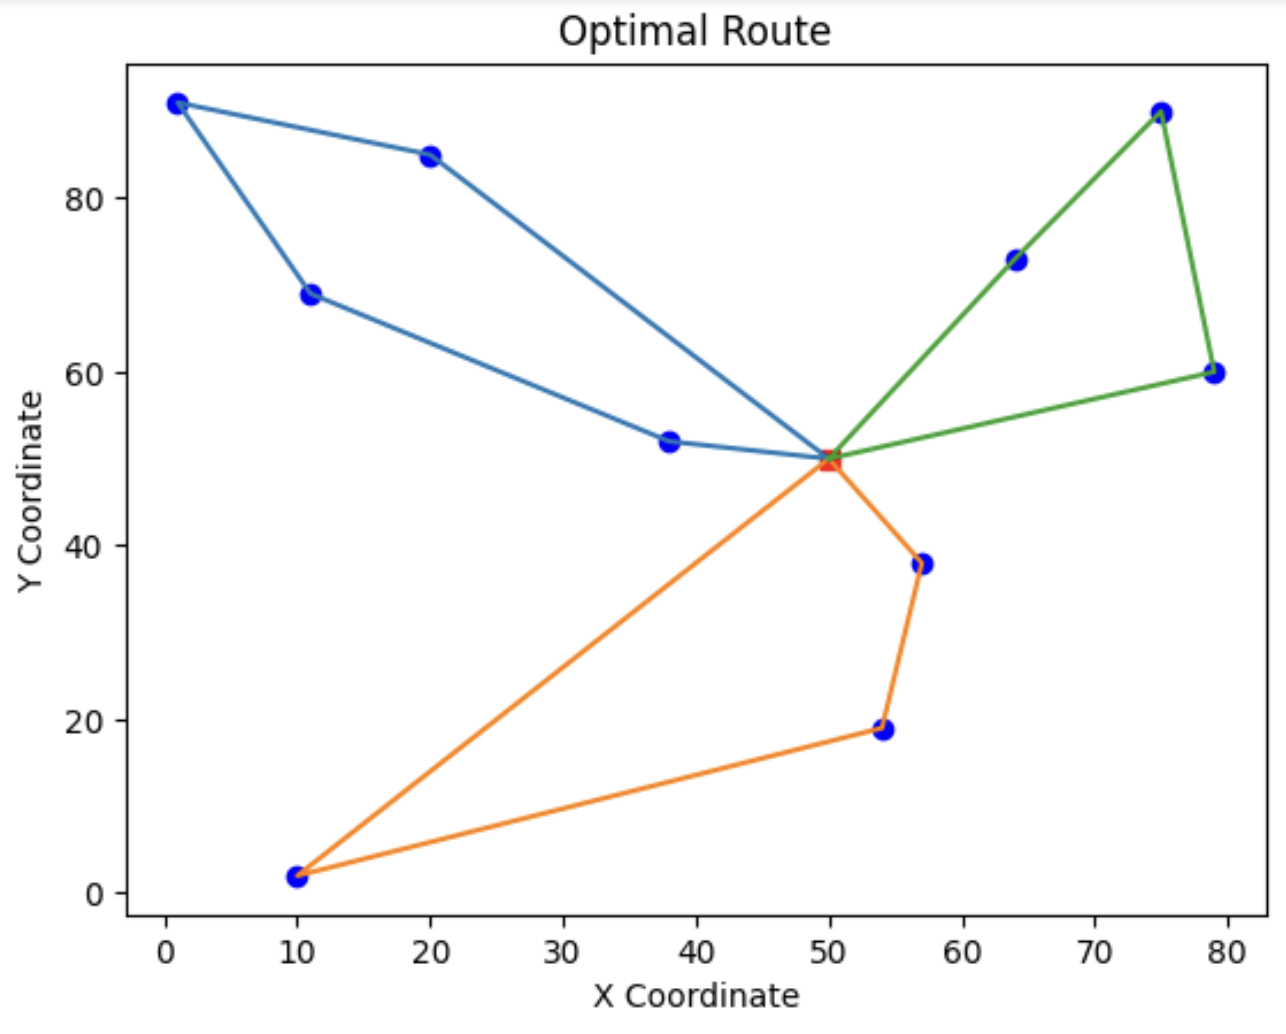

In [2]:
# Install necessary libraries
!pip install matplotlib==3.7.2 deap==1.3.3

# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from IPython import get_ipython
from IPython.display import display




In [19]:

# Define the problem parameters
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50,50)  # Define the central depot location as a fixed point
num_vehicles = 4  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [20]:


# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluate function


# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


In [21]:

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(8, 8))
    plt.title(title)

    # Plot depot
    plt.scatter(depot[0], depot[1], marker='s', color='black', s=100, label='Depot')

    # Plot locations and routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1}')

    plt.legend()
    plt.show()


In [22]:


# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)  # Run the genetic algorithm

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()  # Call the main function


gen	nevals	avg    	min    
0  	300   	554.986	3.98936
1  	213   	536.234	10.3479
2  	243   	527.888	6.79712
3  	232   	524.551	10.0921
4  	233   	515.771	8.37499
5  	218   	509.849	6.34337
6  	213   	510.514	4.56526
7  	233   	507.799	4.56526
8  	219   	495.263	3.12735
9  	209   	490.241	5.72645
10 	224   	482.979	6.30149
11 	230   	489.001	6.30149
12 	230   	479.807	5.92704
13 	217   	462.06 	4.12289
14 	231   	448.939	4.74192
15 	250   	425.454	4.74192
16 	238   	399.99 	1.67638
17 	236   	389.87 	4.56849
18 	225   	378.415	5.05728
19 	225   	369.974	12.9035
20 	209   	364.386	8.72458
21 	232   	358.509	7.39178
22 	237   	352.096	12.1248
23 	217   	352.827	5.40066
24 	227   	350.465	6.75296
25 	246   	348.663	5.5879 
26 	233   	345.751	11.3182
27 	219   	344.582	20.5991
28 	229   	341.158	18.6191
29 	223   	340.496	17.1542
30 	238   	344.514	18.1114
31 	225   	342.455	7.65972
32 	221   	340.138	13.569 
33 	243   	337.552	17.3361
34 	232   	335.156	14.1478
35 	244   	334.307	14.5021
3

Best individual: [14, 8, 12, 13, 2, 16, 5, 4, 11, 3, 9, 1, 19, 7, 6, 0, 15, 18, 17, 10]
Best fitness: (551.3394812447334, 24.32223729671203)


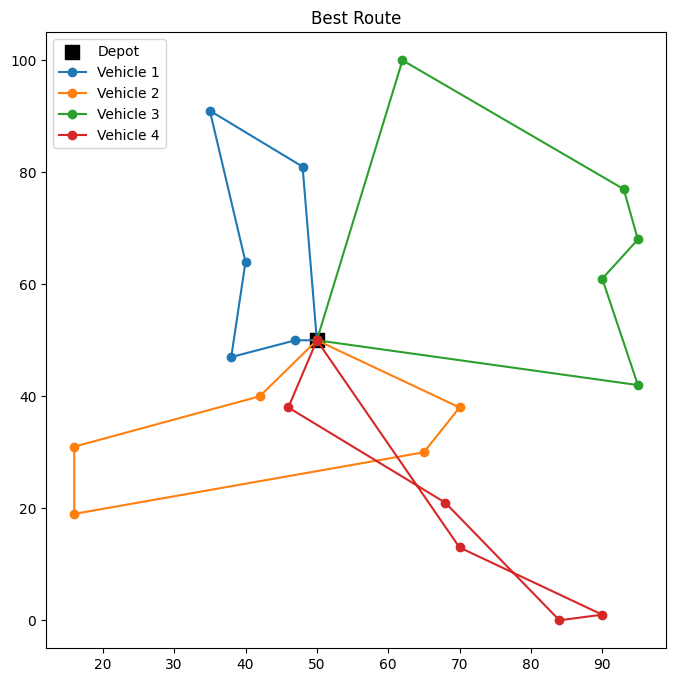

In [23]:

    # Print the results
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Best fitness:", best_individual.fitness.values)

    # Visualize the best route
    plot_routes(best_individual, title="Best Route")